# Introduction

> Use the `keras` from Tensorflow to build ANN model that would fit the credit score data and be able to generalize well.

Use the Credit Score Classification dataset provided [here](https://www.kaggle.com/datasets/parisrohan/credit-score-classification) to train and test your design.

**Notes:**
- Split the data as you see fit and use validation during training.
- You may re-use the EDA, data preparation, and other sections you previously used in ML1 assignemnts.
- Remember that you can use classification metrics from other libraries as well (e.g., `sklearn`)
- Plot the loss, and accuracy against epochs and extract insights on how well of a fit your model is.
- This time the notebook is not prepared with sections and instructions so that you can do it yourself.
- If you are stuck, you can consult the [Keras User Guide](https://keras.io/api/). There are some useful [Code Examples](https://keras.io/examples/) as well.


<H1><B>Import Libraries</B></H1>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import set_random_seed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

set_random_seed(99)

In [2]:
x_train = pd.read_csv("Data/x_train.csv")
x_val = pd.read_csv("Data/x_val.csv")
y_train = pd.read_csv("Data/y_train.csv")
y_val = pd.read_csv("Data/y_val.csv")

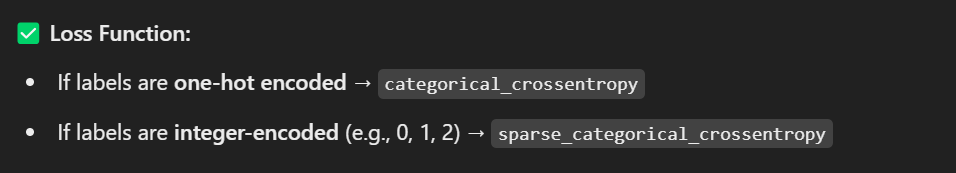

In [3]:
model = Sequential()

model.add(Dense(512, input_shape=(x_train.shape[1],), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))

model.add(Dense(3, activation='softmax'))

model.compile(optimizer = Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               22016     
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [4]:
history = model.fit(x= x_train, y= y_train, validation_data= (x_val, y_val), batch_size=512, epochs=100, verbose=2, 
          callbacks=[early_stopping])

Epoch 1/100
176/176 - 8s - loss: 0.8175 - accuracy: 0.6245 - val_loss: 0.7642 - val_accuracy: 0.6365 - 8s/epoch - 45ms/step
Epoch 2/100
176/176 - 5s - loss: 0.7246 - accuracy: 0.6712 - val_loss: 0.7168 - val_accuracy: 0.6749 - 5s/epoch - 26ms/step
Epoch 3/100
176/176 - 4s - loss: 0.7071 - accuracy: 0.6802 - val_loss: 0.6929 - val_accuracy: 0.6903 - 4s/epoch - 24ms/step
Epoch 4/100
176/176 - 4s - loss: 0.6950 - accuracy: 0.6880 - val_loss: 0.6858 - val_accuracy: 0.6944 - 4s/epoch - 24ms/step
Epoch 5/100
176/176 - 4s - loss: 0.6892 - accuracy: 0.6904 - val_loss: 0.6930 - val_accuracy: 0.6947 - 4s/epoch - 23ms/step
Epoch 6/100
176/176 - 4s - loss: 0.6834 - accuracy: 0.6942 - val_loss: 0.6782 - val_accuracy: 0.6963 - 4s/epoch - 20ms/step
Epoch 7/100
176/176 - 4s - loss: 0.6765 - accuracy: 0.6978 - val_loss: 0.6743 - val_accuracy: 0.6991 - 4s/epoch - 20ms/step
Epoch 8/100
176/176 - 3s - loss: 0.6717 - accuracy: 0.6994 - val_loss: 0.6743 - val_accuracy: 0.7012 - 3s/epoch - 20ms/step
Epoch 9/

In [5]:
model.evaluate(x_val, y_val)

313/313 [==============================] - 1s 2ms/step - loss: 0.5039 - accuracy: 0.7892


[0.503899872303009, 0.7892000079154968]

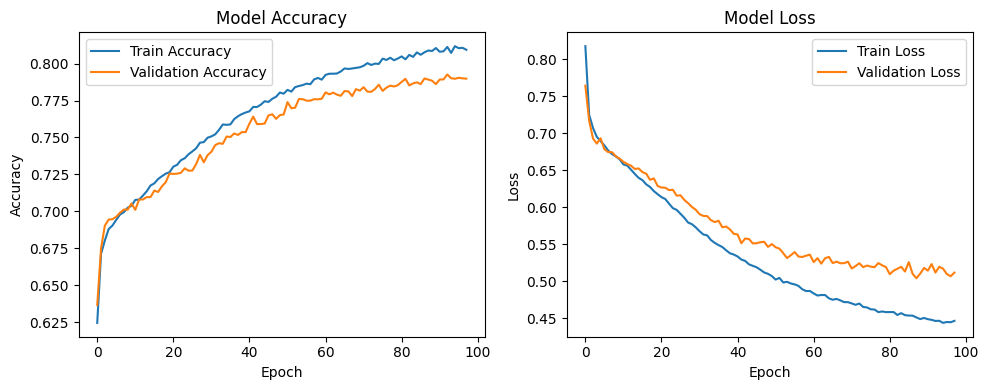

In [6]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

#  Plot Accuracy
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='upper left')

#  Plot Loss
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

#  Show the plot
plt.tight_layout()   #prevent overlapping and improve readability.
plt.show()